In [155]:
#import library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [156]:
#connect to google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [157]:
path_data_file  = "/content/drive/MyDrive/Data-Science/PORT/CREDIT_CARD_FRAUD/data/creditcard.csv"

In [158]:
#read data
df =  pd.read_csv(path_data_file)

In [159]:
df.groupby(['Class'])['Class'].count()

Class
0    284315
1       492
Name: Class, dtype: int64

In [160]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [161]:
df.shape

(284807, 31)

In [162]:
#display info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [163]:
#check null value
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [164]:
df.groupby(['Class'])['Class'].count()

Class
0    284315
1       492
Name: Class, dtype: int64

In [165]:
df_class = df.groupby(['Class'])['Amount'].count().reset_index()
df_class.rename(columns={'Amount':'Class_amt'},inplace = True)
df_class["PCT"] = (df_class["Class_amt"]*100)/df_class["Class_amt"].sum()
df_class

,Class,Class_amt,PCT
0,0,284315,99.827251
1,1,492,0.172749


<Axes: xlabel='Class', ylabel='PCT'>

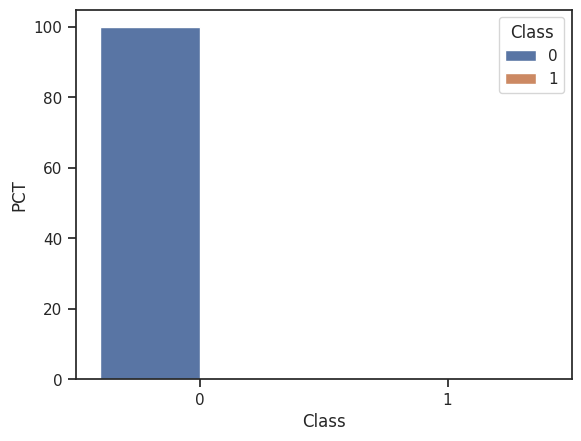

In [166]:
# plot bar  chart  check target feature
sns.barplot(data=df_class , x="Class" ,y="PCT", hue = "Class")

In [167]:
# calculate target feature percent
round(df_class.PCT,2)

0    99.83
1     0.17
Name: PCT, dtype: float64

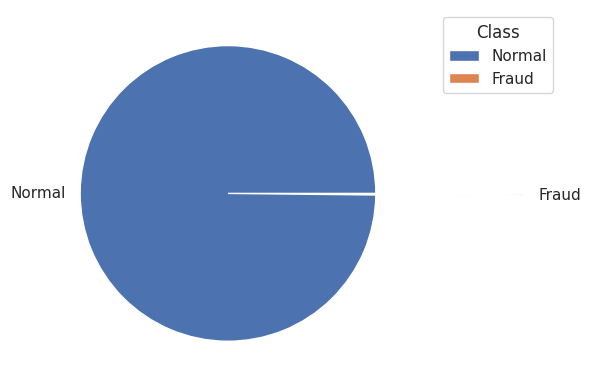

In [168]:
#plot pie chart class ratio
#Data
data = round(df_class.PCT,2)
labels = ["Normal","Fraud"]
explode = [1, 0]

#seaborn library

#pie chart
#plt.title("Target Feature (Class) Ratio")
#plt.pie(data, labels = labels, autopct='%.2f%%',explode = explode)
plt.pie(data, labels = labels,explode = explode)
plt.legend(loc='upper right',title="Class")
plt.show()

In [169]:
df['hour'] = df['Time'] /(60*60)

In [170]:
normal_df = df[df['Class']==0]
fraud_df = df[df['Class']==1]

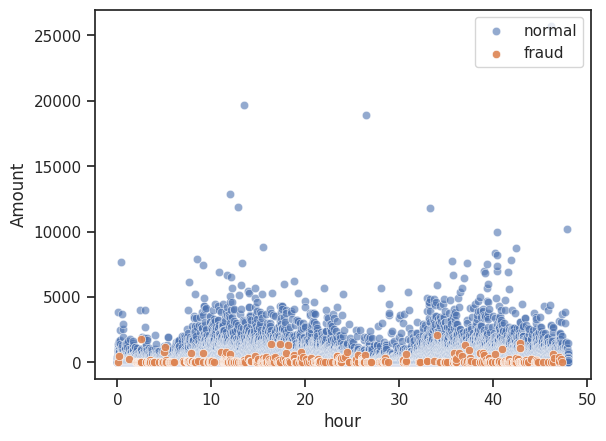

In [171]:
sns.scatterplot(data = normal_df , x="hour" , y="Amount" , label="normal" ,  alpha=0.6)
sns.scatterplot(data = fraud_df , x="hour" , y="Amount" , label="fraud" ,  alpha=0.9)
plt.legend(loc='upper right')

In [172]:
from scipy.stats import probplot
def plot_hist_qq(data_frame , feature_name):

  data = data_frame[feature_name]

  # Assuming 'data' is your dataset
  sns.set(style="whitegrid")

  # Create a figure with two subplots
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))

  # Plot histogram
  sns.histplot(data, kde=True, color='skyblue', ax=ax1)
  ax1.set_title('Histogram of '+feature_name)

  # Q-Q plot
  probplot(data, dist='norm', plot=ax2)
  ax2.set_title('Q-Q Plot '+feature_name)

  #plt.tight_layout()
  plt.show()

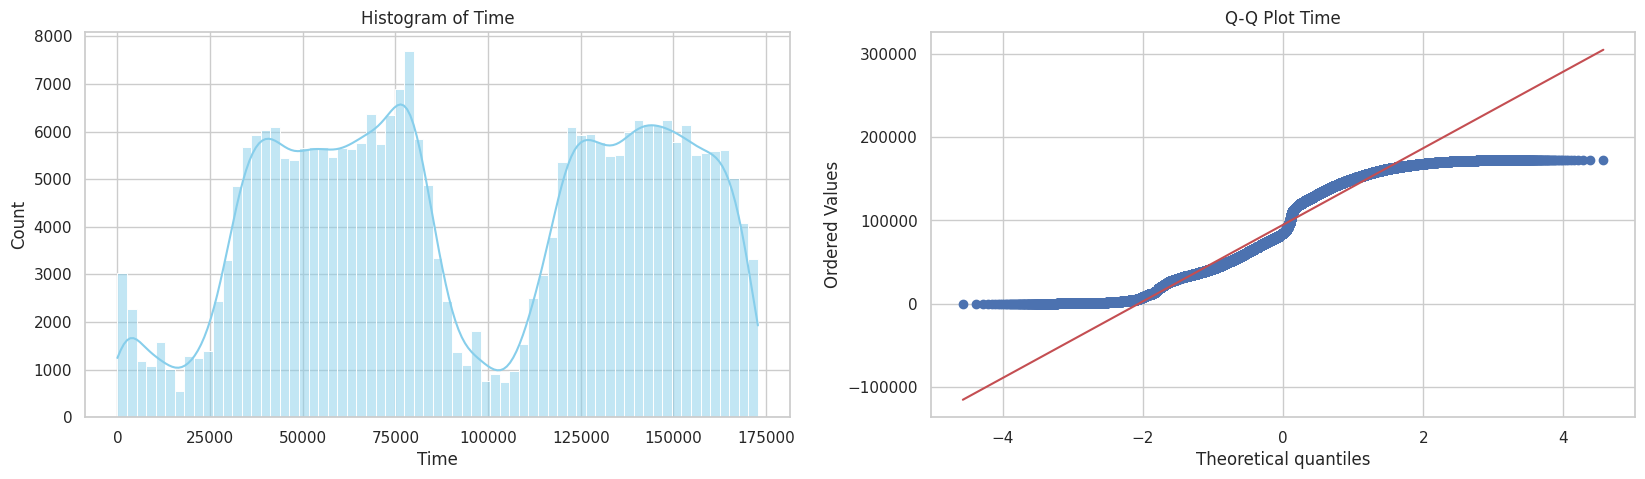

In [95]:
#plot histogram and qq plot time
plot_hist_qq(df,'Time')

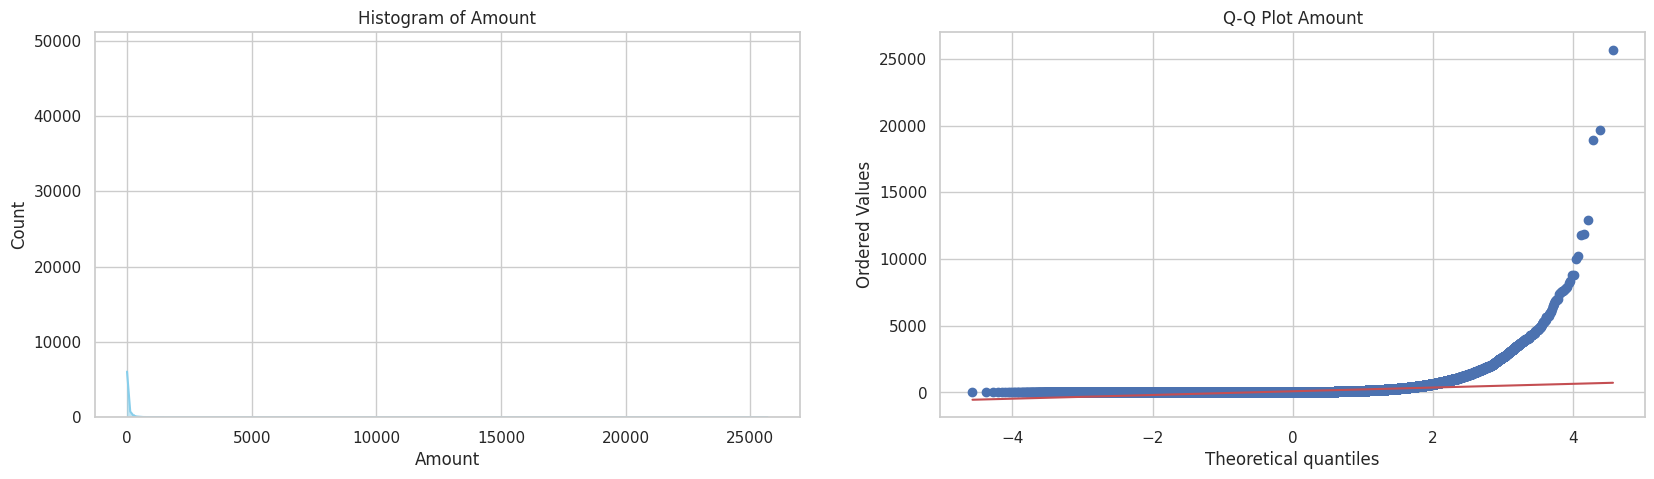

In [173]:
#plot histogram and qq plot amount
plot_hist_qq(df,'Amount')

<Axes: xlabel='Amount', ylabel='Density'>

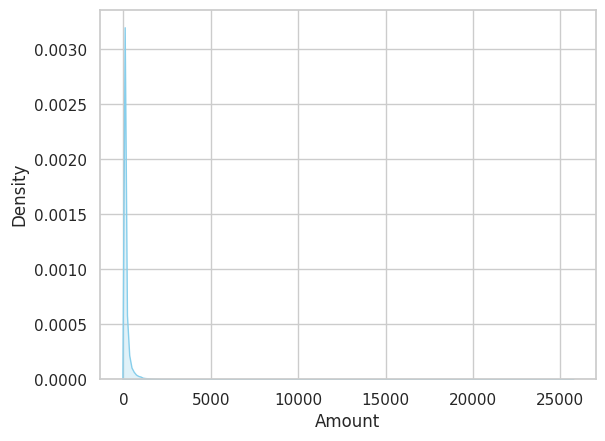

In [174]:
sns.kdeplot(df['Amount'], fill=True, color='skyblue')

In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 32 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [176]:
from sklearn.preprocessing import MinMaxScaler


# Assuming 'data' is your dataset



df_class = df['Class']
df_features = df.drop('Class',axis=1)
df_features = df_features.drop('Time',axis=1)

scaler = MinMaxScaler()

X = scaler.fit_transform(df_features.values)
df_normalized = pd.DataFrame(X)
df_normalized['Class'] = df['Class']

In [177]:
df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      284807 non-null  float64
 1   V2      284807 non-null  float64
 2   V3      284807 non-null  float64
 3   V4      284807 non-null  float64
 4   V5      284807 non-null  float64
 5   V6      284807 non-null  float64
 6   V7      284807 non-null  float64
 7   V8      284807 non-null  float64
 8   V9      284807 non-null  float64
 9   V10     284807 non-null  float64
 10  V11     284807 non-null  float64
 11  V12     284807 non-null  float64
 12  V13     284807 non-null  float64
 13  V14     284807 non-null  float64
 14  V15     284807 non-null  float64
 15  V16     284807 non-null  float64
 16  V17     284807 non-null  float64
 17  V18     284807 non-null  float64
 18  V19     284807 non-null  float64
 19  V20     284807 non-null  float64
 20  V21     284807 non-null  float64
 21  V22     28

In [178]:
df_normalized.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   0       284807 non-null  float64
 1   1       284807 non-null  float64
 2   2       284807 non-null  float64
 3   3       284807 non-null  float64
 4   4       284807 non-null  float64
 5   5       284807 non-null  float64
 6   6       284807 non-null  float64
 7   7       284807 non-null  float64
 8   8       284807 non-null  float64
 9   9       284807 non-null  float64
 10  10      284807 non-null  float64
 11  11      284807 non-null  float64
 12  12      284807 non-null  float64
 13  13      284807 non-null  float64
 14  14      284807 non-null  float64
 15  15      284807 non-null  float64
 16  16      284807 non-null  float64
 17  17      284807 non-null  float64
 18  18      284807 non-null  float64
 19  19      284807 non-null  float64
 20  20      284807 non-null  float64
 21  21      28

In [179]:
normal_tran = df_normalized[df_normalized['Class']==0]
fraud_tran = df_normalized[df_normalized['Class']==1]

In [180]:
# Anormalous with auto encoder
#tranin       set normal_tran 90%  fraud_tran  = 0
#validation   set normal_tran 5%  fraud_tran  = 50%
#test         set normal_tran 5%  fraud_tran  = 50%

RANDOM_SEED = 42

#split fraud transaction
fraud_tran_valid = fraud_tran.sample(frac=0.50,random_state=RANDOM_SEED)
fraud_tran = fraud_tran.drop(fraud_tran_valid.index)

# validation set
df_val =normal_tran.sample(frac=0.05 , random_state=RANDOM_SEED)
normal_tran = normal_tran.drop(df_val.index)
df_val = pd.concat([df_val, fraud_tran_valid], axis=0)


# test set
df_test =normal_tran.sample(frac=0.05, random_state=RANDOM_SEED)
normal_tran = normal_tran.drop(df_test.index)
df_test = pd.concat([df_test, fraud_tran], axis=0)

#train set
df_train  = normal_tran.copy()

print(f" Train      dimension {df_train.shape} fraud tranactions= {len(df_train[df_train.Class==1])}")
print(f" Validation dimension {df_val.shape} fraud tranactions= {len(df_val[df_val.Class==1])}")
print(f" Test       dimension {df_test.shape} fraud tranactions= {len(df_test[df_test.Class==1])}")


 Train      dimension (256594, 31) fraud tranactions= 0
 Validation dimension (14462, 31) fraud tranactions= 246
 Test       dimension (13751, 31) fraud tranactions= 246


In [184]:
data_train_set = df_train.copy()

In [185]:
from sklearn.model_selection import train_test_split
X_train, X_test= train_test_split(data_train_set,test_size=0.2, random_state=RANDOM_SEED)
X_train = X_train.drop(['Class'],axis=1).values

y_test = X_test['Class']
X_test = X_test.drop(['Class'],axis=1).values



In [186]:
import tensorflow as tf
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers
# # This returns a tensor

# input = Input(X_train.shape[1], name='input')

# # Encoder layers
# encoder = Dense(40, activation='relu', name='encoder1')(input)
# encoder = Dense(20, activation='relu', name='encoder2')(encoder)
# encoder = Dense(8, activation='relu', name='encoder3')(encoder)

# # Decoder layers
# decoder = Dense(20, activation='relu', name='decoder1')(encoder)
# decoder = Dense(40, activation='relu', name='decoder2')(decoder)
# decoder = Dense(30, activation='relu', name='decoder3')(decoder)

# # This creates a model that includes
# # the Input layer and four Dense layers
# autoencoder = Model(inputs=input, outputs=decoder)

In [107]:
# encoding_dim = 14
# input_dim = X_train.shape[1]


# input_layer = Input(shape=(input_dim,))
# encoder = Dense(encoding_dim, activation="tanh",
#                 activity_regularizer=regularizers.l1(10e-5))(input_layer)
# encoder = Dense(int(encoding_dim / 2), activation="relu")(encoder)

# decoder = Dense(int(encoding_dim/2), activation='tanh')(encoder)
# decoder = Dense(input_dim, activation='relu')(decoder)

# autoencoder = Model(inputs=input_layer, outputs=decoder)

In [187]:
#setup model layer
input_layer = Input(shape=(X_train.shape[1]))
encoded = Dense(16, activation='relu',
                activity_regularizer=regularizers.l1(10e-5))(input_layer)
encoded = Dense(8, activation='relu')(encoded)
decoded = Dense(16, activation='relu')(encoded)
decoded = Dense(30, activation='sigmoid')(decoded)

autoencoder = Model(inputs=input_layer, outputs=decoded)

In [188]:
autoencoder.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 30)]              0         
                                                                 
 dense_8 (Dense)             (None, 16)                496       
                                                                 
 dense_9 (Dense)             (None, 8)                 136       
                                                                 
 dense_10 (Dense)            (None, 16)                144       
                                                                 
 dense_11 (Dense)            (None, 30)                510       
                                                                 
Total params: 1286 (5.02 KB)
Trainable params: 1286 (5.02 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [189]:
# set up model optimize and early stopping
from keras.callbacks import EarlyStopping ,ReduceLROnPlateau
PATH_MODEL  = "/content/drive/MyDrive/Data-Science/PORT/CREDIT_CARD_FRAUD/model/"
PATH_LOG = "/content/drive/MyDrive/Data-Science/PORT/CREDIT_CARD_FRAUD/log/"
# Configure the learning process, by compiling the model

autoencoder.compile(optimizer='adam',
                    metrics=['accuracy'],
                    loss='mean_squared_error')
# Saving the model

cp = ModelCheckpoint(filepath=PATH_MODEL+"credit_card_fraud.h5",
                     save_best_only=True,
                     verbose=0)
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=30)

# TensorBoard basic visualizations.
# This callback writes a log for TensorBoard,
# which allows you to visualize dynamic graphs of your training and test metrics
# tb = TensorBoard(log_dir=PATH_LOG,
#                  histogram_freq=0,
#                  write_graph=True,
#                  write_images=True)

# Starts training
# autoencoder: same training(x) and target data(y)
# validation_data: tuple (x_val, y_val) on which
# to evaluate the loss and any model metrics at the end of each epoch.




In [190]:
X_train.shape

(205275, 30)

In [191]:
# train model
nb_epoch = 100
batch_size = 32
history = autoencoder.fit(X_train, X_train,
                    epochs=nb_epoch,
                    batch_size=batch_size,
                    shuffle=True,
                    validation_data=(X_test, X_test),callbacks=[es,cp],
                    verbose=1)

Epoch 1/100
6415/6415 [==============================] - 21s 3ms/step - loss: 0.0024 - accuracy: 0.9384 - val_loss: 0.0011 - val_accuracy: 0.9566
Epoch 2/100
  42/6415 [..............................] - ETA: 15s - loss: 0.0011 - accuracy: 0.9531

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6415/6415 [==============================] - 23s 4ms/step - loss: 0.0010 - accuracy: 0.9550 - val_loss: 9.2298e-04 - val_accuracy: 0.9561
Epoch 3/100
6415/6415 [==============================] - 20s 3ms/step - loss: 8.8847e-04 - accuracy: 0.9579 - val_loss: 8.6594e-04 - val_accuracy: 0.9583
Epoch 4/100
6415/6415 [==============================] - 20s 3ms/step - loss: 8.5724e-04 - accuracy: 0.9589 - val_loss: 8.5121e-04 - val_accuracy: 0.9579
Epoch 5/100
6415/6415 [==============================] - 21s 3ms/step - loss: 8.4760e-04 - accuracy: 0.9585 - val_loss: 8.4638e-04 - val_accuracy: 0.9569
Epoch 6/100
6415/6415 [==============================] - 26s 4ms/step - loss: 8.4160e-04 - accuracy: 0.9582 - val_loss: 8.3858e-04 - val_accuracy: 0.9578
Epoch 7/100
6415/6415 [==============================] - 21s 3ms/step - loss: 8.3788e-04 - accuracy: 0.9576 - val_loss: 8.4218e-04 - val_accuracy: 0.9559
Epoch 8/100
6415/6415 [==============================] - 20s 3ms/step - loss: 8.3509e-04 - a

In [113]:
# #Visualizing metrics on local system
# !tensorboard --logdir=PATH_LOG

In [114]:
def get_model(name):
  model = load_model(name)
  return model

In [115]:
#load model
autoencoder = get_model(PATH_MODEL+'credit_card_fraud.h5')

In [116]:
def plot_loss_epoch(loss_data , epoch_data):
  plt.plot(loss_data)
  plt.plot(epoch_data)
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper right')
  plt.show()

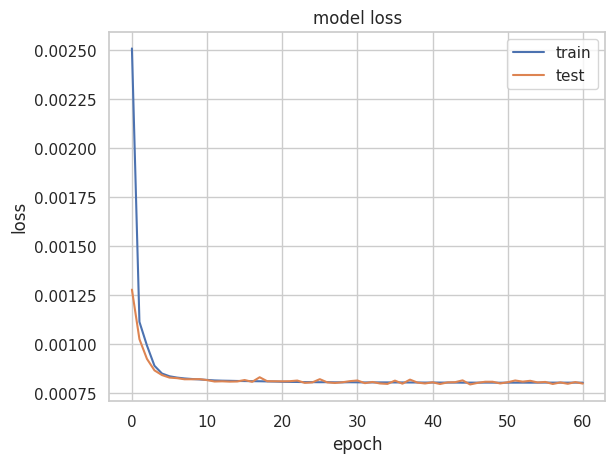

In [117]:
#plot loss during train
plot_loss_epoch(history.history['loss'],history.history['val_loss'])


In [118]:
def plot_accuracy_epoch(acc_data,val_data):
  plt.plot(acc_data)
  plt.plot(val_data)
  plt.title('model acc')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='lower right')
  plt.show()

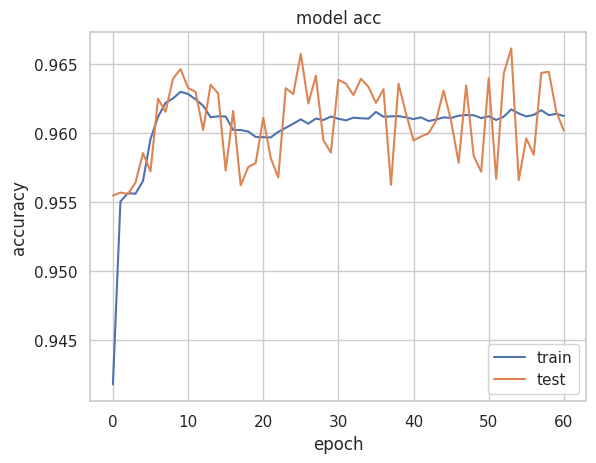

In [119]:
# plot model accuracy
plot_accuracy_epoch(history.history['accuracy'],history.history['val_accuracy'])

In [120]:
def predict(model,x,y):
  test_x_predictions = autoencoder.predict(x)
  mse = np.mean(np.power(x - test_x_predictions, 2), axis=1)
  error_df = pd.DataFrame({'Reconstruction_error': mse,
                        'True_class': y})
  return  error_df

In [121]:
# test reconstuct train data back
error_df  = predict(autoencoder,X_test,y_test)
error_df.describe()

1604/1604 [==============================] - 3s 2ms/step


,Reconstruction_error,True_class
count,51319.000000,51319.0
mean,0.000774,0.0
std,0.000981,0.0
min,0.000060,0.0
25%,0.000347,0.0
50%,0.000555,0.0
75%,0.000937,0.0
max,0.088675,0.0


In [122]:
error_df.head()

,Reconstruction_error,True_class
3405,0.000727,0
13719,0.001078,0
264285,0.000607,0
105807,0.000588,0
63149,0.000343,0


In [123]:
from sklearn.metrics import confusion_matrix, precision_recall_curve
from sklearn.metrics import recall_score, classification_report, auc, roc_curve
from sklearn.metrics import precision_recall_fscore_support, f1_score
def plot_roc_curve(true_class_data , reconstruct_error_data ):
  false_pos_rate, true_pos_rate, thresholds = roc_curve(true_class_data,
                                                      reconstruct_error_data)
  roc_auc = auc(false_pos_rate, true_pos_rate,)

  plt.figure(figsize=(6, 6))
  plt.plot(false_pos_rate, true_pos_rate, linewidth=5, label='AUC = %0.3f'% roc_auc)
  plt.plot([0,1],[0,1], linewidth=5)

  plt.xlim([-0.01, 1])
  plt.ylim([0, 1.01])
  plt.legend(loc='lower right')
  plt.title('Receiver operating characteristic curve (ROC)')
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  plt.show()

In [124]:
# validation
data_val_set  = df_val.copy()
y_val_test=data_val_set["Class"]
data_val_set =data_val_set.drop("Class",axis=1)

In [125]:
df_val.groupby(["Class"])['Class'].count()

Class
0    14216
1      246
Name: Class, dtype: int64

In [126]:
# use model predict with validation set
error_df_val  = predict(autoencoder,data_val_set,y_val_test)
error_df_val.describe()

452/452 [==============================] - 1s 2ms/step


,Reconstruction_error,True_class
count,14462.000000,14462.000000
mean,0.001087,0.017010
std,0.003671,0.129313
min,0.000059,0.000000
25%,0.000349,0.000000
50%,0.000564,0.000000
75%,0.000970,0.000000
max,0.078526,1.000000


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


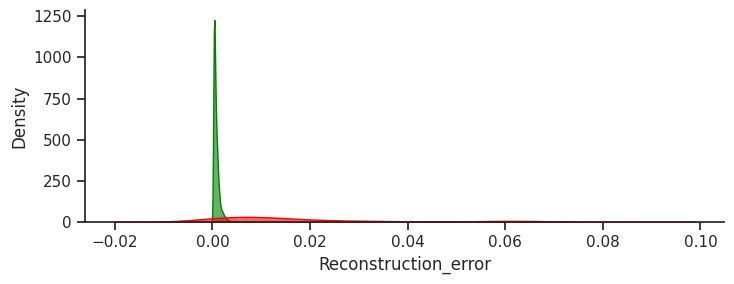

In [127]:
figsize =( 15, 8)
sns.set_style("ticks")
s = sns.FacetGrid(error_df_val, hue = 'True_class',aspect = 2.5, palette ={1 : 'red', 0 :'green'})
s.map(sns.kdeplot, 'Reconstruction_error', shade = True, alpha = 0.6)
plt.show()

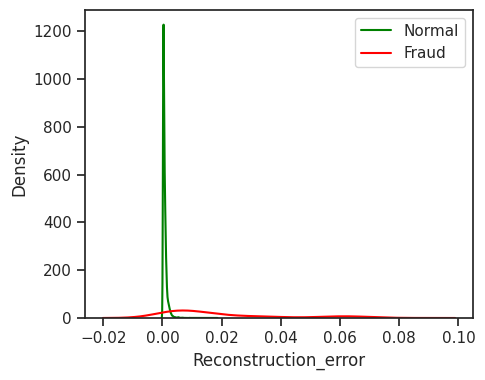

In [128]:
#plot visulze  normal  and fraud  reconstruction error
plt.figure(figsize = (5,4))
sns.kdeplot(data=error_df_val[error_df_val['True_class']==0], color="green" ,x= "Reconstruction_error",label="Normal" )
sns.kdeplot(data=error_df_val[error_df_val['True_class']==1], color="red" ,x= "Reconstruction_error",label="Fraud" )
plt.legend()
plt.show()

In [129]:
error_df_val.columns

Index(['Reconstruction_error', 'True_class'], dtype='object')

In [130]:
error_df_val.groupby(['True_class'])['True_class'].count()

True_class
0    14216
1      246
Name: True_class, dtype: int64

In [131]:
error_df_val.isna().sum()

Reconstruction_error    0
True_class              0
dtype: int64

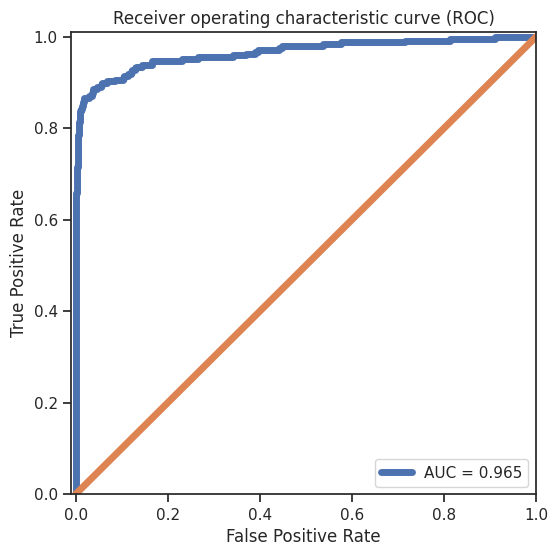

In [132]:
# plot roc curve validation set
plot_roc_curve(error_df_val.True_class,error_df_val.Reconstruction_error)

In [133]:
def calculate_f1score(precision , recall):
  f1_score =  2*precision*recall/(precision+recall)
  return f1_score

In [134]:
def find_optimize_threshold_f1score(threshold_list , precision_list , recall_list  ):
  optimize_threshold = 0;
  best_f1score = 0
  for i in range(len(threshold_list)):
    f1 = calculate_f1score(precision_list[i],recall_list[i])
    if(best_f1score<f1):
      best_f1score = f1
      optimize_threshold = precision_list[i]
  print(i)
  return best_f1score,optimize_threshold


In [135]:
def plot_precision_recall(true_class_data , reconstruct_error_data):
  precision_rt, recall_rt, threshold_rt = precision_recall_curve(true_class_data,
                                                               reconstruct_error_data)

  pr_auc = auc(recall_rt, precision_rt,)

  plt.figure(figsize=(6, 6))
  plt.plot(recall_rt, precision_rt, linewidth=5, label='AUC = %0.3f'% pr_auc)
  plt.legend(loc='upper right')
  plt.title('Recall vs Precision')
  plt.xlabel('Recall')
  plt.ylabel('Precision')
  plt.show()

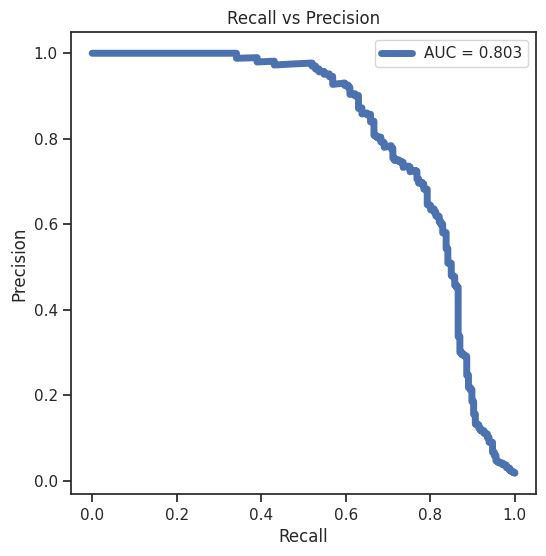

In [136]:
# plot precision recall  curve validation set
plot_precision_recall(error_df_val.True_class,error_df_val.Reconstruction_error)

In [137]:
def plot_precision_recall_threshold(true_class_data,reconstruct_error_data):
  precision_rt, recall_rt, threshold_rt = precision_recall_curve(true_class_data,
                                                               reconstruct_error_data)
  plt.figure(figsize=(6, 6))
  plt.plot(threshold_rt, precision_rt[1:], label="Precision",linewidth=5)
  plt.plot(threshold_rt, recall_rt[1:], label="Recall",linewidth=5)
  plt.title('Precision and recall for different threshold values')
  plt.xlabel('Threshold')
  plt.ylabel('Precision/Recall')
  plt.legend()
  plt.show()

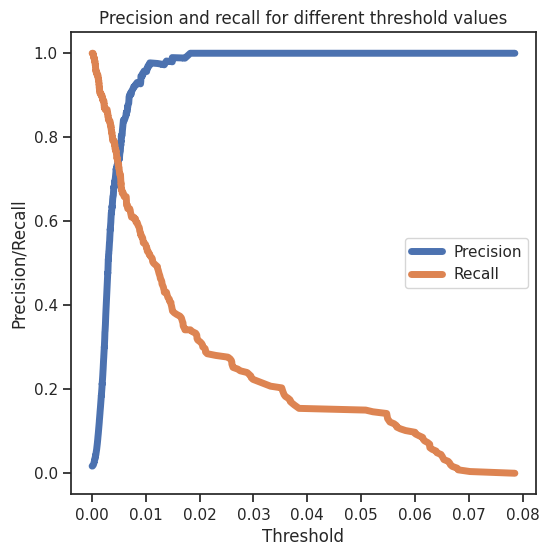

In [138]:
# plot precision recall curve with threshold
plot_precision_recall_threshold(error_df_val.True_class,error_df_val.Reconstruction_error)

In [139]:
def find_optimize_threshold_f1score(threshold_list , precision_list , recall_list  ):
  optimize_threshold = 0;
  best_f1score = 0
  for i in range(len(threshold_list)):
    f1 = calculate_f1score(precision_list[i],recall_list[i])
    if(best_f1score<f1):
      best_f1score = f1
      optimize_threshold = threshold_list[i]
  #print(i)
  return best_f1score,optimize_threshold

In [140]:
def calculate_precision_recall_threhold(true_class_data,reconstruct_error_data):
  precision_rt, recall_rt, threshold_rt = precision_recall_curve(true_class_data,
                                                               reconstruct_error_data)
  return precision_rt,recall_rt,threshold_rt

In [141]:
#find optimize threshold
precision_rt, recall_rt, threshold_rt = calculate_precision_recall_threhold(error_df_val.True_class,
                                                               error_df_val.Reconstruction_error)


best_f1 , opt_threshold = find_optimize_threshold_f1score(threshold_rt,precision_rt,recall_rt)
print("best_f1 =",best_f1)
print("opt_threshold =",opt_threshold)

best_f1 = 0.7455621301775147
opt_threshold = 0.00451375443923006


best_f1 = 0.7455621301775147
opt_threshold = 0.00451375443923006


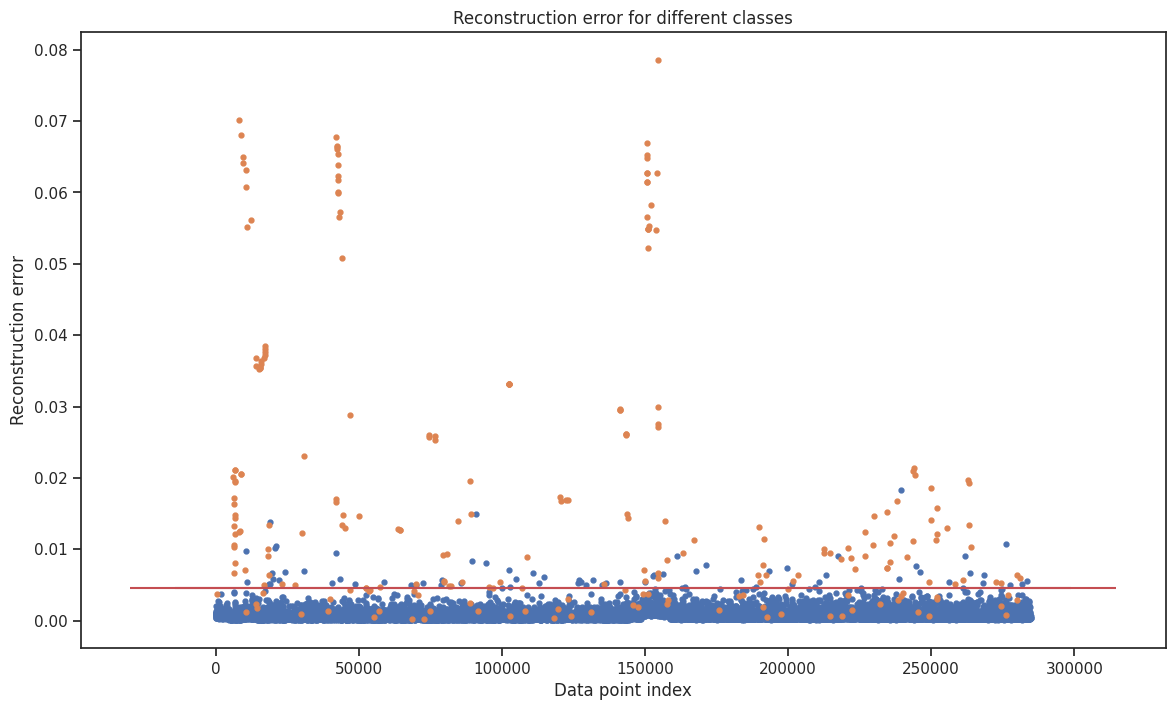

In [142]:
best_f1 , opt_threshold = find_optimize_threshold_f1score(threshold_rt,precision_rt,recall_rt)
print("best_f1 =",best_f1)
print("opt_threshold =",opt_threshold)

threshold_fixed = opt_threshold
groups = error_df_val.groupby('True_class')
fig, ax = plt.subplots(figsize=(14, 8))

for name, group in groups:
    ax.plot(group.index, group.Reconstruction_error, marker='o', ms=3.5, linestyle='',label= "Fraud" if name == 1 else "Normal")
    ax.hlines(threshold_fixed, ax.get_xlim()[0], ax.get_xlim()[1],colors="r", zorder=100, label='Threshold')


plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

In [143]:
def predict_by_threshold(threshold,error_data):
  pred_y = [1 if e > threshold else 0 for e in error_data]
  return pred_y

def display_confusion_matrix(true_class,predict_data,title="",LABELS = ["0","1"]):
  conf_matrix = confusion_matrix(true_class, predict_data)
  plt.figure(figsize=(4, 4))
  sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d",cmap="Blues");
  plt.title(title+" Confusion matrix")
  plt.ylabel('True class')
  plt.xlabel('Predicted class')
  plt.show()

              precision    recall  f1-score   support

      Normal       1.00      0.99      1.00     14216
       Fraud       0.72      0.76      0.74       246

    accuracy                           0.99     14462
   macro avg       0.86      0.88      0.87     14462
weighted avg       0.99      0.99      0.99     14462



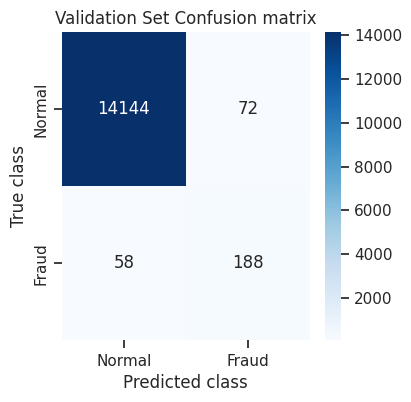

In [144]:
# confusion matrix after cutoff with optimize threshold
from sklearn.metrics import  classification_report
LABELS = ["Normal","Fraud"]
pred_y = predict_by_threshold(opt_threshold,error_df_val.Reconstruction_error.values)

print(classification_report(error_df_val["True_class"],pred_y,target_names=LABELS))
display_confusion_matrix(error_df_val.True_class,pred_y,"Validation Set",LABELS)


In [145]:
#error_df_val["Predicted_class"]=[1 if x > opt_threshold  else 0 for x in error_df_val["Reconstruction_error"]]

In [146]:
df_test.head()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,Class
241430,0.957507,0.768656,0.835671,0.220322,0.766631,0.253115,0.277802,0.779005,0.466720,0.493487,...,0.504938,0.670395,0.384453,0.567163,0.394593,0.412644,0.309521,0.007633,0.873999,0
158575,0.942824,0.776224,0.838145,0.252854,0.770906,0.254504,0.263107,0.753307,0.492474,0.480079,...,0.582124,0.671100,0.383477,0.552169,0.392793,0.420788,0.317100,0.000039,0.645099,0
220728,0.934466,0.782288,0.837973,0.194435,0.766359,0.253932,0.269779,0.792554,0.451840,0.473487,...,0.486997,0.665252,0.522943,0.587662,0.296725,0.410940,0.312927,0.001327,0.823429,0
168781,0.987922,0.763399,0.832518,0.333925,0.761209,0.262672,0.261456,0.786862,0.517184,0.496662,...,0.496256,0.668424,0.352625,0.561982,0.295384,0.418246,0.313432,0.003112,0.690894,0
83196,0.935819,0.780925,0.873375,0.262013,0.764513,0.262886,0.265585,0.793327,0.420948,0.504759,...,0.493003,0.662771,0.380597,0.585639,0.536705,0.417810,0.313861,0.000103,0.345653,0


In [147]:
# holdout
data_holdout_set  = df_test.copy()
y_holdout_test=data_holdout_set["Class"]
data_holdout_set =data_holdout_set.drop("Class",axis=1)

In [148]:
#predict with holdout data set
error_df_holdout  = predict(autoencoder,data_holdout_set,y_holdout_test)
error_df_holdout.describe()

430/430 [==============================] - 1s 2ms/step


,Reconstruction_error,True_class
count,13751.000000,13751.000000
mean,0.001127,0.017890
std,0.003998,0.132555
min,0.000067,0.000000
25%,0.000350,0.000000
50%,0.000565,0.000000
75%,0.000967,0.000000
max,0.077030,1.000000


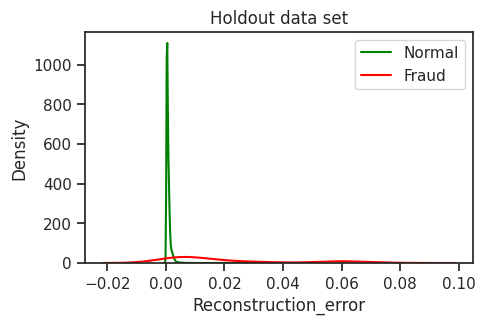

In [149]:
#plot visulze  normal  and fraud  reconstruction error
plt.figure(figsize = (5,3))

sns.kdeplot(data=error_df_holdout[error_df_holdout['True_class']==0], color="green" ,x= "Reconstruction_error",label="Normal" )
sns.kdeplot(data=error_df_holdout[error_df_holdout['True_class']==1], color="red" ,x= "Reconstruction_error",label="Fraud" )

plt.title("Holdout data set")

plt.legend()
plt.show()

In [150]:
opt_threshold

0.00451375443923006

              precision    recall  f1-score   support

      Normal       1.00      0.99      0.99     13505
       Fraud       0.70      0.74      0.72       246

    accuracy                           0.99     13751
   macro avg       0.85      0.87      0.86     13751
weighted avg       0.99      0.99      0.99     13751



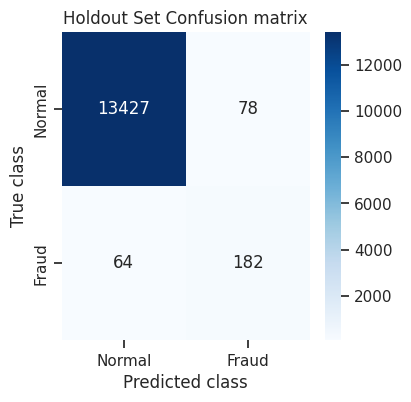

In [151]:
# cut off with optimize threshold
pred_y = predict_by_threshold(opt_threshold,error_df_holdout.Reconstruction_error.values)
print(classification_report(error_df_holdout["True_class"],pred_y,target_names=LABELS))
display_confusion_matrix(error_df_holdout.True_class,pred_y,"Holdout Set",LABELS)
